# Necessary Packages importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




# Data reading with pandas package

In [88]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin","BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url,names=columns)

# Columns in the dataset

In [89]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Check for Data Information

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Checking for imbalance in the dataset:
` The dataset has 2 classes (0 repeats for 500 times and 1 is 268) which implies imbalance into the dataset`

In [92]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: title={'center': 'Outcome column'}, ylabel='count'>

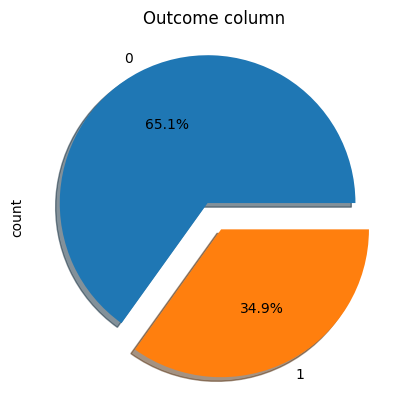

In [95]:
df.Outcome.value_counts().plot(kind='pie',title="Outcome column", legend=False, \
                   autopct='%1.1f%%', explode=(0.1, 0.1), \
                   shadow=True, startangle=0)

# Outlier checking

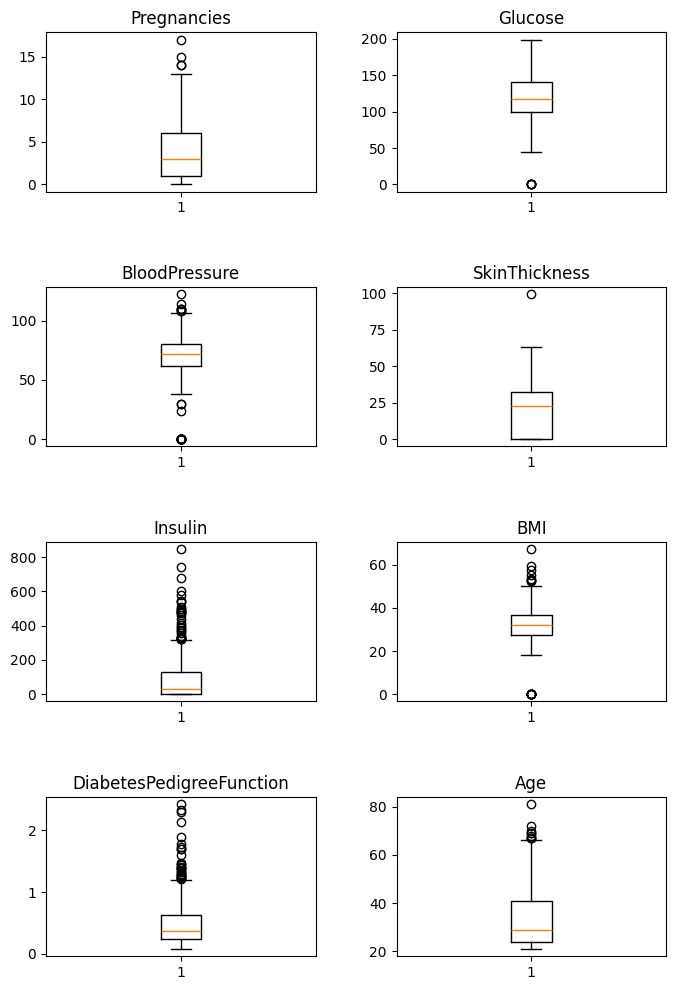

In [96]:
fig, axis = plt.subplots(4,2,figsize=[8,12])
df1=df.iloc[:,:-1]#.drop(['Insulin','Glucose'],axis=1)
for i in range(8):
    axis.flatten()[i].boxplot(df1.iloc[:,i].values)
    axis.flatten()[i].set_xticks(ticks=[1])
    axis.flatten()[i].set_title(df1.columns[i])
plt.subplots_adjust(wspace=0.3,hspace=0.6)
plt.show()

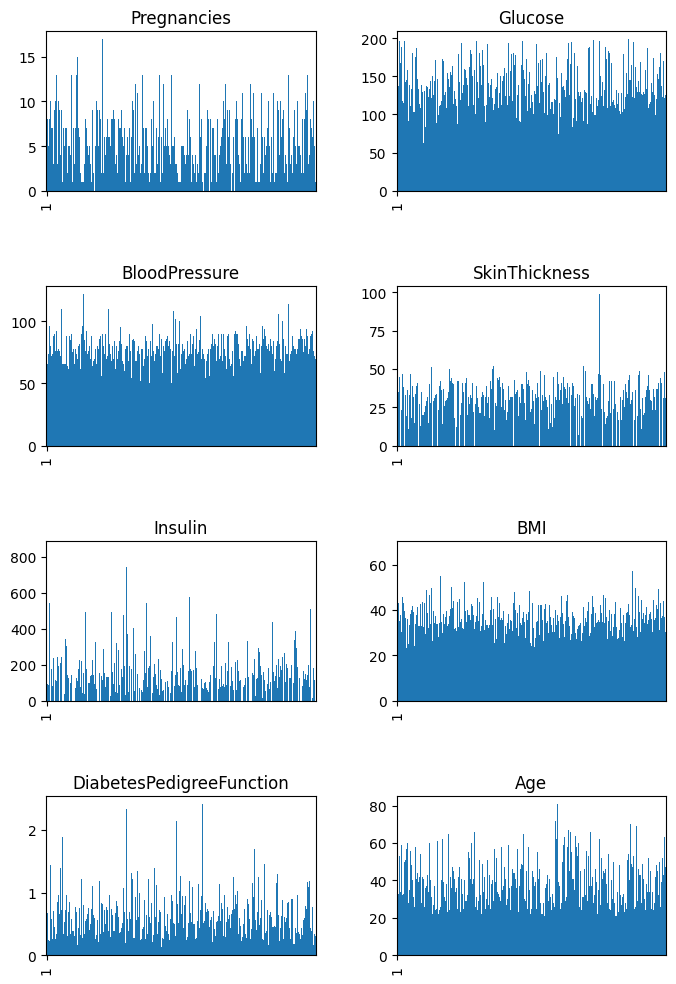

In [97]:
fig, axis = plt.subplots(4,2,figsize=[8,12])
df1=df.iloc[:,:-1]#.drop(['Insulin','Glucose'],axis=1)
for i in range(8):
    df1.iloc[:,i].plot(kind='bar',ax= axis.flatten()[i],width=2)
    axis.flatten()[i].set_xticks(ticks=[1])
    axis.flatten()[i].set_title(df1.columns[i])
plt.subplots_adjust(wspace=0.3,hspace=0.6)
plt.show()

In [98]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# From the above plots it is clear that in the features of Insulin, Age, DiabetesPedigreeFunction, and BMI are the ones with more 
# outlies compare to the others

# Features selection:

**Check for correlattion between variables to ensure if there are no variable which are correlated(linearly dependents).

** In addition, the correlation between input variable with target will be checked for keeping the most contibuting inputs to the output.

** If there are variable which are more correlated to oone another, the least correlated to the target will be removed (Feature selection).


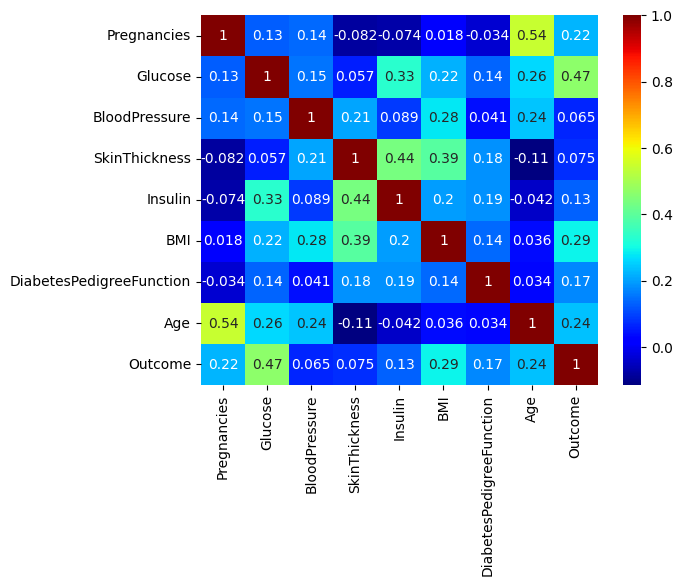

In [99]:
df_corr=df.corr()
sns.heatmap(df_corr,cmap='jet',annot=True)
plt.show()

In [ ]:
# ---- Outlier Replacement Function ----
def replace_outliers(X, threshold=3):
    """ Replaces outliers with the min/max non-outlier values """
    # Z-score calculation
    z_scores = np.abs((X - X.mean(axis=0)) / X.std(axis=0))
    print(z_scores.max())
    for i in range(X.shape[1]):
        # Find outliers based on the threshold
        outliers_pos = z_scores[:, i] > threshold  # Positive outliers
        outliers_neg = z_scores[:, i] < -threshold  # Negative outliers

        # Replace positive outliers with the maximum non-outlier value
        X[outliers_pos, i] = X[~outliers_pos, i].max()

        # Replace negative outliers with the minimum non-outlier value
        X[outliers_neg, i] = X[~outliers_neg, i].min()

    return X

# Functions for Normalizing the data:
## 1. $X_{norm} =\frac{X-\mu}{\sigma}\implies X_{norm}\in [\mu-\sigma,\mu+\sigma] $ 
## 2. $X_{norm} =\frac{X-X_{min}}{X_{max}-X_{min}}\implies X_{norm}\in [0,1]$ 

In [79]:
def Normalize_std(X):
    x_mean=X.mean(axis=0)
    x_std=X.std(axis=0)+1e-8
    x_norm = (X-x_mean)/x_std
    return x_norm
    
def Normalize_MinMax(X):
    x_min=X.min(axis=0)
    x_max=X.max(axis=0)+1e-4
    x_norm = (X-x_min)/(x_max-x_min)
    return x_norm
    

# Normalize the input data

In [10]:
x_norm_std = Normalize_std(X)
x_norm_minmax = Normalize_MinMax(X)

In [11]:
x_norm_std.max(axis=0)

array([3.90657834, 2.44447821, 2.73452825, 4.92186583, 2.139362  ,
       4.45580749, 5.88356459, 4.06371575])

In [12]:
x_norm_minmax.max(axis=0)

array([0.99999412, 0.9999995 , 0.99999918, 0.99999899, 0.9999996 ,
       0.99999851, 0.9999573 , 0.99999833])

# Split the data (X,y) into training and test set into the ratio of [80% ,20%]

In [13]:
(Xtrain_std,Xtest_std,ytrain_std,ytest_std) = tts(x_norm_std ,y,test_size=0.20, random_state=42)
(Xtrain_norm_minmax,Xtest_norm_minmax,ytrain_norm_minmax,ytest_norm_minmax) = tts(x_norm_minmax,y,test_size=0.20, random_state=42)

# The shape of the splitted dataset

In [14]:
Xtrain_std.shape,Xtest_std.shape,ytrain_std.shape,ytest_std.shape

((614, 8), (154, 8), (614,), (154,))

# Equation for prediction:   $\hat y = W*X_{in} + b$

# Loss function for binary cross entropy $Loss= - \frac{1}{n}\sum(y*\log \hat y +(1-y)*\log(1-\hat y)) $ where $\hat y$ is the predicted probability and $y$ is the output class label.

In [81]:
# Logistic Regression Class
class LogisticRegression:
    def __init__(self, lr=0.01, n_iters=3000, l2_lambda=0.01, class_weight=None):
        self.lr = lr
        self.n_iters = n_iters
        self.l2 = l2_lambda
        self.class_weight = class_weight or {0:1, 1:1}
        self.weights = None
        self.bias = None

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _compute_weights(self, y):
        return np.array([self.class_weight[yt] for yt in y])

    def fit(self, X, y,plotTrainloss=False,jump=200):
        recorded_number, number_of_variables = X.shape
        self.weights = np.random.randn(number_of_variables)
        self.bias = 0
        # sample_weights = self._compute_weights(y)#
        train_loss = []
        for _ in range(self.n_iters):
            z = X.dot(self.weights) + self.bias #predict the input data
            pred = self._sigmoid(z) #Apply the activation function to the linear model for an output
            error = (pred - y) #* sample_weights
            train_loss_epoch= self.log_loss(y,pred) #compute the cross entropy loss
            train_loss.append(train_loss_epoch) #store the loss per each epoch
            if _%jump ==0:
            
             print(f'at the epoch {_}, entropy loss: {train_loss_epoch}')
                # dw = (X.T.dot(error) + self.l2 * self.weights) / recorded_number
            dw = X.T.dot(error) / recorded_number# ( (1/n)* SUM [ X_transposed * (ypred -y)])
            db = np.sum(error) / recorded_number # ( (1/n)* SUM [(ypred -y)])
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        if plotTrainloss:
            self.PlotTrainLoss(train_loss)
            
        return train_loss

    # def predict_proba(self, z):
    #     return self._sigmoid(X.dot(self.weights) + self.bias)
        
    def log_loss(self, y, ŷ):
        loss = -(1/y.shape[0])*np.sum(y*np.log(ŷ) +(1-y)*np.log(1-ŷ))
        return loss

    def predict(self, X, threshold=0.5):
        
        predicted_y = self._sigmoid(X.dot(self.weights) + self.bias)
        classes = np.array([1 if predicted_y [i]>=0.5  else 0.  for i in range(predicted_y.shape[0])])
        return classes
    def Accuracy(self, y,ypred):
        equally_classes = (1/y.shape[0])*(y==ypred).sum()
        return equally_classes 
        
    def PlotTrainLoss(self,trainingloss):
        min_val = np.round(min(trainingloss),3)
        max_val = np.round(max(trainingloss),3)
        MIN=min_val-0.01; MAX=max_val+0.001
        yInterval = np.round(np.linspace(MIN,MAX,8),3)
        plt.plot(range(len(trainingloss)),trainingloss,label='Training Loss',linewidth=3)
        plt.xlabel('Epochs',fontweight='bold')
        plt.ylabel('CrossEntropyLoss',fontweight='bold')
        plt.xticks(range(len(trainingloss))[slice(None,None,1000)],fontweight='bold')
        plt.yticks(yInterval,fontweight='bold')
        plt.grid()
        plt.legend(loc='upper right',prop = {'weight':'bold'})
        plt.show()





# Model_training on the normalized data around the mean

at the epoch 0, entropy loss: 0.8493316098958718
at the epoch 2000, entropy loss: 0.583316887077637
at the epoch 4000, entropy loss: 0.5065355510164541
at the epoch 6000, entropy loss: 0.4825832111904758
at the epoch 8000, entropy loss: 0.4743769367133207


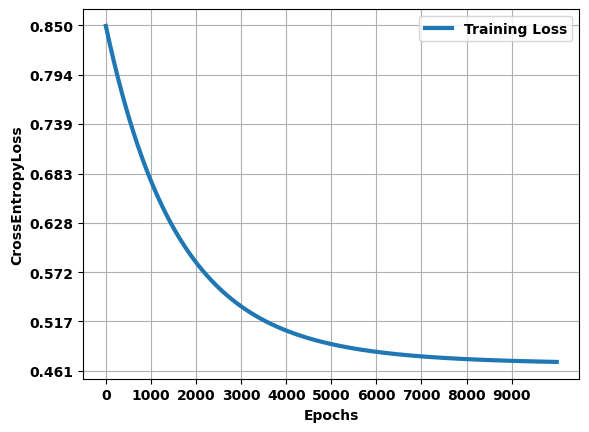

In [82]:
# Train model with class weights to handle imbalance
model = LogisticRegression(lr=0.002, n_iters=10000, l2_lambda=0.01, class_weight={0:1, 1:2})
trainingloss = model.fit(Xtrain_std, ytrain_std,plotTrainloss=True,jump=2000)



# Testing on the z-score normalized data

In [83]:

predicted_class =model.predict(Xtest_std)
accuracy = model.Accuracy( ytest_std,predicted_class)


# Using Sklearn packages

In [84]:
# print(f"\n✅ Best threshold = {best_t:.3f}")
print(f"✅ Test Accuracy = {accuracy_score(ytest_std, predicted_class):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(ytest_std,predicted_class))
print("\nClassification Report:\n", classification_report(ytest_std, predicted_class))

✅ Test Accuracy = 0.7662

Confusion Matrix:
 [[81 18]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



# Training on the data normalized using MinMax Scaling

at the epoch 0, entropy loss: 0.7615912817699425
at the epoch 2000, entropy loss: 0.6756921920689953
at the epoch 4000, entropy loss: 0.6668809365284013
at the epoch 6000, entropy loss: 0.6597761673647098
at the epoch 8000, entropy loss: 0.6531445691604806


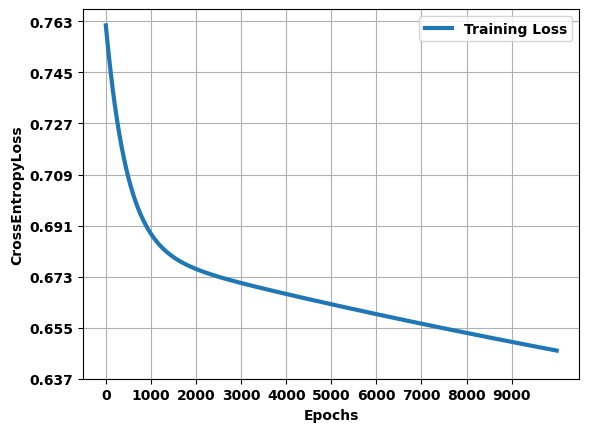

In [85]:
# Train model with class weights to handle imbalance
model = LogisticRegression(lr=0.002, n_iters=10000, l2_lambda=0.01, class_weight={0:1, 1:2})
trainingloss = model.fit(Xtrain_norm_minmax, ytrain_norm_minmax,plotTrainloss=True,jump=2000)

# Testing the model on the test sample

In [86]:

predicted_class =model.predict(Xtest_norm_minmax)
accuracy = model.Accuracy( ytest_norm_minmax,predicted_class)
print(f'Accuracy from scratch: {accuracy}')
# print(f"\n✅ Best threshold = {best_t:.3f}")
print(f"✅ Test Accuracy = {accuracy_score(ytest_norm_minmax, predicted_class):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(ytest_norm_minmax,predicted_class))
print("\nClassification Report:\n", classification_report(ytest_norm_minmax, predicted_class))

Accuracy from scratch: 0.6623376623376623
✅ Test Accuracy = 0.6623

Confusion Matrix:
 [[96  3]
 [49  6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.97      0.79        99
           1       0.67      0.11      0.19        55

    accuracy                           0.66       154
   macro avg       0.66      0.54      0.49       154
weighted avg       0.66      0.66      0.57       154



# Let check for the unique values in each column

In [19]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique values ({len(unique_vals)}): {unique_vals}")
    print("-" * 10)

Column: Pregnancies
Unique values (17): [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
----------
Column: Glucose
Unique values (136): [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
----------
Column: BloodPressure
Unique values (47): [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
----------
Column: SkinThickness
Unique values (51): [35 29  

# Correlation between variables

# Dropping missing values

In [100]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]
# Step 1: Replace zeros with NaN in selected feature columns
clean_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]
df[clean_cols] = df[clean_cols].replace(0, np.nan)  # Replaces all 0 → NaN :contentReference[oaicite:1]{index=1}

# Step 2: Drop rows where any of these columns is NaN
df.dropna(subset=clean_cols, inplace=True)  # Removes rows missing any critical feature :contentReference[oaicite:2]{index=2}

# Optional: Confirm if any NaNs remain
print(df[clean_cols].isna().sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Age              0
dtype: int64


## After finding that working with those variables which are less correlated to the inputs, 
## it is clear that the accuracy is not good as expected. Let's introduce some transformations to the inputs features to check its contributions.

1. Interaction between features
2. Polynomial of degree like 2 or 3.
3. Log-transform

# 1. Iteraction between variables using multiplication, and division

In [101]:
#Use polynomial features:
df['Glucose_BMI'] = df['Glucose'] * df['BMI']
df['Glucose_per_Age'] = df['Glucose'] / (df['Age'] + 1)
df['Insulin_BMI'] = df['Insulin'] * df['BMI']


In [102]:
df['BMI_per_Age'] = df['BMI'] / (df['Age'] + 1)

# 2. Polynomial Transform

In [103]:
df['Age2'] = df['Age'] ** 2
df['Age3'] = df['Age'] ** 3


In [104]:
df['BMI2'] = df['BMI'] ** 2
df['BMI3'] = df['BMI'] ** 3

# Data standardization

In [105]:
# Standardization
scale_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age",
              "Glucose_per_Age", "BMI2", "Glucose_BMI", "Age2", "BMI_per_Age"]
for c in scale_cols:
    df[c + "_s"] = (df[c] - df[c].mean()) / df[c].std()


# 3. Log transforms

In [40]:

for c in ["Insulin", "SkinThickness", "Glucose", "BMI"]:
    df[c + "_log"] = np.log1p(df[c])


In [106]:
# Final features
feature_cols = [c + "_s" for c in scale_cols] + [c + "_log" for c in ["Insulin", "SkinThickness", "Glucose", "BMI"]]

# Check for correlation between input features and also between input features(X) and outcome (y)

In [107]:
import seaborn as sns

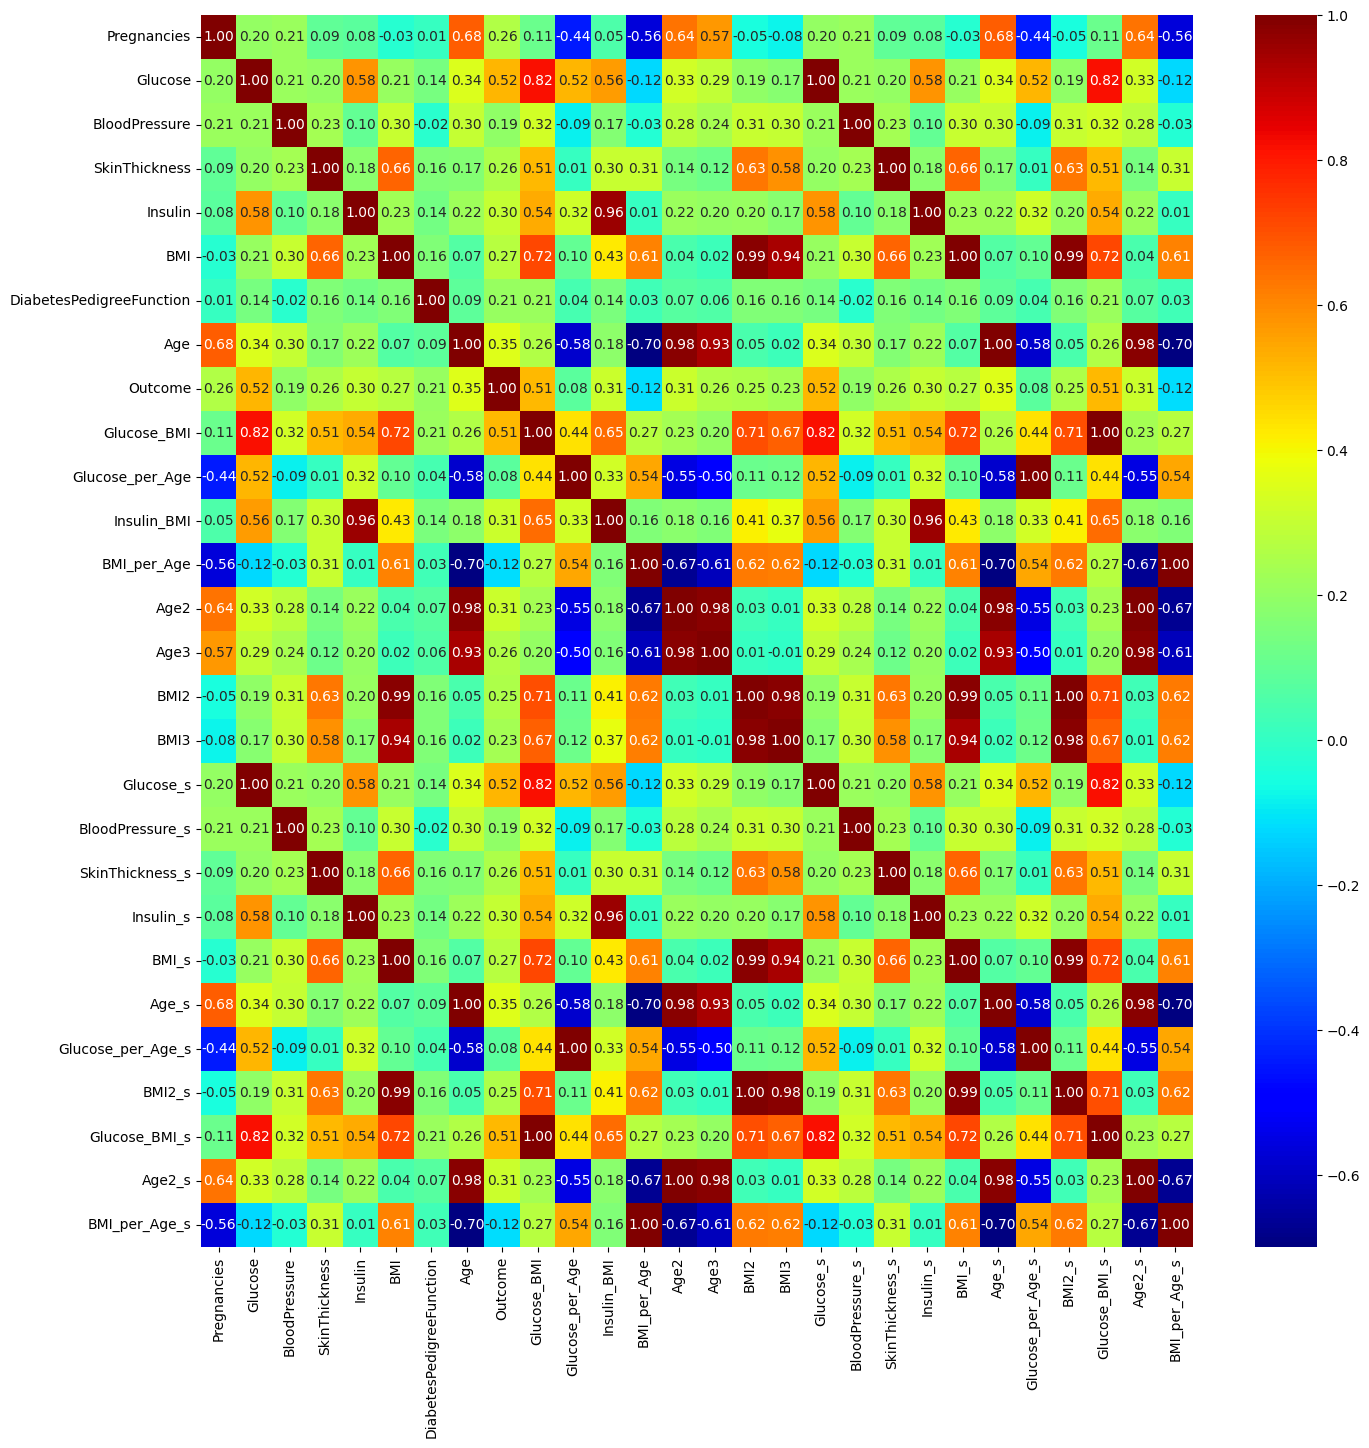

In [108]:

plt.figure(figsize=[16,16])
df_corr=df.corr()
sns.heatmap(df_corr,cmap='jet',annot=True, fmt=".2f")
plt.show()

In [112]:
df_corr_outcome = df.corr().loc['Outcome',:]
print(df_corr_outcome.sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.515703
Glucose_s                   0.515703
Glucose_BMI_s               0.512502
Glucose_BMI                 0.512502
Age                         0.350804
Age_s                       0.350804
Insulin_BMI                 0.313675
Age2                        0.311288
Age2_s                      0.311288
Insulin_s                   0.301429
Insulin                     0.301429
BMI                         0.270118
BMI_s                       0.270118
Age3                        0.259006
Pregnancies                 0.256566
SkinThickness               0.255936
SkinThickness_s             0.255936
BMI2_s                      0.252856
BMI2                        0.252856
BMI3                        0.230361
DiabetesPedigreeFunction    0.209330
BloodPressure               0.192673
BloodPressure_s             0.192673
Glucose_per_Age_s           0.078999
Glucose_per_Age             0.078999
BMI_per_Age_s              -0.119987
B

In [125]:
Feature_to_consider = ['Glucose' ,'Glucose_s' ,  'Glucose_BMI_s' , 'Glucose_BMI','Age',
                       'Age_s' ,'Insulin_BMI' ,'Age2', 'Age2_s'
                       ,'Insulin_s' ,'Insulin', 'BMI' ,'BMI_s' ,'Age3' ,'Pregnancies', 'SkinThickness'               
,'SkinThickness_s', 'BMI2_s',  'BMI2' ,'BMI3' , 'DiabetesPedigreeFunction']    


In [126]:


X = df[Feature_to_consider].values
y = df["Outcome"].values


In [68]:
df.shape

(392, 32)

In [127]:
# ---- Outlier Replacement Function ----
def replace_outliers(X, threshold=3):
    """ Replaces outliers with the min/max non-outlier values """
    # Z-score calculation
    z_scores = np.abs((X - X.mean(axis=0)) / X.std(axis=0))
    print(z_scores.max())
    for i in range(X.shape[1]):
        # Find outliers based on the threshold
        outliers_pos = z_scores[:, i] > threshold  # Positive outliers
        outliers_neg = z_scores[:, i] < -threshold  # Negative outliers

        # Replace positive outliers with the maximum non-outlier value
        X[outliers_pos, i] = X[~outliers_pos, i].max()

        # Replace negative outliers with the minimum non-outlier value
        X[outliers_neg, i] = X[~outliers_neg, i].min()

    return X




In [128]:
# ---- Replace outliers in the dataset ----
X_no_outliers = replace_outliers(X,threshold=2.5)


9.65186946705667


In [129]:
# Split data
X_train, X_test, y_train, y_test = tts(X_no_outliers, y, test_size= 0.2, random_state=42)


# Model Training

Epoch 0: Cross-entropy loss = 0.6931


/tmp/ipykernel_4620/4152812082.py:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 50000: Cross-entropy loss = 9.0044
Epoch 100000: Cross-entropy loss = 18.4501
Epoch 150000: Cross-entropy loss = 6.3560
Epoch 200000: Cross-entropy loss = 9.4458
Epoch 250000: Cross-entropy loss = 9.2692


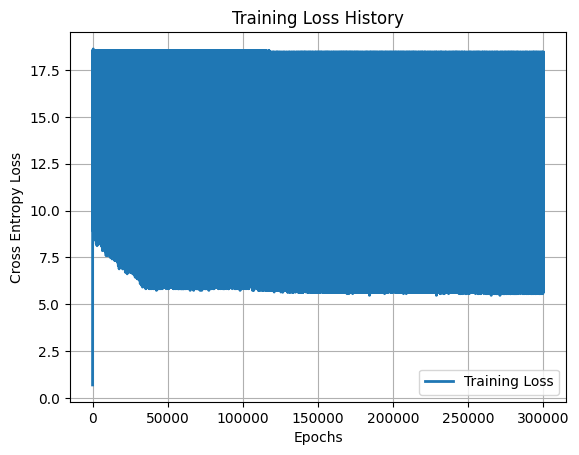

In [130]:
# Logistic Regression Class
class LogisticRegression:
    def __init__(self, lr=0.01, n_iters=3000, l2_lambda=0.01, class_weight=None):
        self.lr = lr
        self.n_iters = n_iters
        self.l2 = l2_lambda
        self.class_weight = class_weight or {0:1, 1:1}
        self.weights = None
        self.bias = None
        self.loss_history=None
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _compute_weights(self, y):
        return np.array([self.class_weight[yt] for yt in y])

    def fit(self, X, y,plot_loss=True,jump=300):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        sample_weights = self._compute_weights(y)
        self.loss_history=[]
        for epoch in range(self.n_iters):
            z = X.dot(self.weights) + self.bias
            pred = self._sigmoid(z)
            error = (pred - y) * sample_weights
            dw = (X.T.dot(error) + self.l2 * self.weights) / m
            db = np.sum(error) / m
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            loss = self.log_loss(y, pred)
            self.loss_history.append(loss)
            if epoch % jump == 0:
                print(f"Epoch {epoch}: Cross-entropy loss = {loss:.4f}")

        if plot_loss:
            self.plot_training_loss()

    def predict_proba(self, X):
        return self._sigmoid(X.dot(self.weights) + self.bias)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)
    def log_loss(self, y, y_pred):
        eps = 1e-12
        y_pred = np.clip(y_pred, eps, 1 - eps)
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def plot_training_loss(self):
        plt.plot(self.loss_history, label='Training Loss', linewidth=2)
        plt.xlabel("Epochs")
        plt.ylabel("Cross Entropy Loss")
        plt.title("Training Loss History")
        plt.grid(True)
        plt.legend()
        plt.show()

# Train model with class weights to handle imbalance
model = LogisticRegression(lr=0.01, n_iters=300000, l2_lambda=0.01, class_weight={0:1, 1:2})
model.fit(X_train, y_train,jump=50000)

# Predict probabilities
probs = model.predict_proba(X_test)



In [132]:
# Tune threshold
best_acc, best_t = 0, 0.5
for t in np.linspace(0.3, 0.7, 41):
    preds = (probs >= t).astype(int)
    acc = accuracy_score(y_test, preds)
    if acc > best_acc:
        best_acc, best_t = acc, t

# Final predictions
y_pred = (probs >= best_t).astype(int)

# Results
print(f"\n✅ Best threshold = {best_t:.3f}")
print(f"✅ Test Accuracy = {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



✅ Best threshold = 0.300
✅ Test Accuracy = 0.7089

Confusion Matrix:
 [[40 12]
 [11 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.78        52
           1       0.57      0.59      0.58        27

    accuracy                           0.71        79
   macro avg       0.68      0.68      0.68        79
weighted avg       0.71      0.71      0.71        79



# Conclusion:

It is clear that for different preprocesing method tested on the dataset , none improved model. Based on the correlation, I realized that features are less correlated to the output. This confirm the model accuracy obtained. Finally the accuracy of about 78% was the maximum obtained and due to the defected dataset, this is why it can not be improved.